## Title: Deep Movie Recommender System with Neural Collaborative Filtering



## Name: Julius Aderonmu
## Project: Msc Research

### Introduction

***A Recommender System is a sophisticated framework designed to anticipate or sift through user preferences based on their selections. These systems find applications across diverse domains such as movies, music, news, books, research articles, search queries, social tags, and various product categories.***

***We present the NCF model for movie recomendation system and show the effectiveness of the approach by performing a data analysis of the result.*** 

### Research Questions

#### The following questions are the driving force for this study:
1.	How can a deep learning technique be used to develop a recommendation system that provides more accurate recommendations to users?
2.	How can deep learning-based recommender systems effectively address the cold start problem?
3.	How does the performance of the developed model compare to existing recommender systems?
4.	How does incorporating latent features from the deep network enhance the accuracy of recommendation systems?


### Code
### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_score, recall_score, accuracy_score, mean_squared_error


### Loading Datasets

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
movie_df = pd.read_csv('rotten_tomatoes_movies.csv',encoding='utf-8')
ratings_df = pd.read_csv('rotten_tomatoes_critic_reviews.csv')


In [4]:
movie_df.head(5)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [5]:
movie_df.shape

(17712, 22)

In [6]:
ratings_df.head(5)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [7]:
ratings_df.shape

(1130017, 8)

### Data Preprocessing

In [8]:
# Combine both dataframes
merged_data = pd.merge(ratings_df, movie_df, how='inner')
merged_data.head(5)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,movie_title,movie_info,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff...",Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76


In [9]:
merged_data.shape

(1129887, 29)

In [10]:
merged_data.columns

Index(['rotten_tomatoes_link', 'critic_name', 'top_critic', 'publisher_name',
       'review_type', 'review_score', 'review_date', 'review_content',
       'movie_title', 'movie_info', 'critics_consensus', 'content_rating',
       'genres', 'directors', 'authors', 'actors', 'original_release_date',
       'streaming_release_date', 'runtime', 'production_company',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_status', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count'],
      dtype='object')

In [11]:
merged_data['movie_info'][0]

"Always trouble-prone, the life of teenager Percy Jackson (Logan Lerman) gets a lot more complicated when he learns he's the son of the Greek god Poseidon. At a training ground for the children of deities, Percy learns to harness his divine powers and prepare for the adventure of a lifetime: he must prevent a feud among the Olympians from erupting into a devastating war on Earth, and rescue his mother from the clutches of Hades, god of the underworld."

In [12]:
merged_data['review_content'][0]

'A fantasy adventure that fuses Greek mythology to contemporary American places and values. Anyone around 15 (give or take a couple of years) will thrill to the visual spectacle'

In [13]:

merged_data['critics_consensus'][300]

"Blake Edwards' bawdy comedy may not score a perfect 10, but Dudley Moore's self-deprecating performance makes this midlife crisis persistently funny."

In [14]:
merged_data['review_score'].unique()

array([nan, '3.5/5', '1/4', 'B', '3/5', '4/5', '2/4', '2/5', 'C', '2.5/4',
       '3/4', 'C-', '2.75/5', 'B-', '2.5/5', '5.5/10', '1/5', 'C+', 'D+',
       '1.5/4', '6.5/10', '3/10', '1.5/5', '4/10', '7/10', '6/10', 'B+',
       '5/5', 'A-', '4.5/5', '5.78/10', '3.5/4', 'A', '9/10', '8.5/10',
       '4/4', '83/100', '8/10', '92/100', '82/100', '84/100', '10/10',
       'D-', 'F', '0.5/4', 'D', '5/10', '2/10', '2/6', '0.5/5', '0/4',
       '0/5', '76/100', '87/100', '74/100', '86/100', '81/100', '56/100',
       '78/100', '2.25/5', '8.8/10', '0/10', '44/100', '2.75/4', '2.4/5',
       '8.6/10', '79/100', '68/100', '80/100', '90/100', '66/100',
       '91/100', '0.3/5', '9.2/10', '2.7/5', '57/100', '4/6', '3/6',
       '73/100', '42/100', '65/100', '7.5/10', '4.5/10', '5/6', '1/6',
       '70/100', '3.5/10', '71/100', '0.1/5', '3.25/10', '89/100',
       '40/100', '64/100', '62/100', '1/10', '3.75/5', '37/100', '49/100',
       '60/100', '3.3/5', '77/100', '5.25/10', '1.4/4', '75/100', '

In [15]:
merged_data['review_score'].fillna(0, inplace=True)
merged_data['review_content'].fillna(' ', inplace=True)

In [16]:
merged_data['audience_status'].unique()

array(['Spilled', 'Upright', nan], dtype=object)

In [17]:
merged_data['top_critic'].unique()

array([False,  True])

In [18]:
merged_data['review_type'].unique()

array(['Fresh', 'Rotten'], dtype=object)

In [19]:
merged_data['content_rating'].unique()

array(['PG', 'R', 'NR', 'G', 'PG-13', 'NC17'], dtype=object)

In [20]:
merged_data['tomatometer_status'].unique()

array(['Rotten', 'Certified-Fresh', 'Fresh', nan], dtype=object)

In [21]:
merged_data['tomatometer_rating'].unique()

array([ 49.,  87.,  67., 100.,  89.,   8.,  96.,  20.,  82.,  80.,  91.,
        25.,   4.,  69.,  92.,  75.,   0.,  31.,  63.,  38.,  41.,  93.,
        22.,  33.,  21.,  15.,  64.,  32.,  61.,  52.,  24.,  14.,  44.,
        60.,  97.,  36.,  99.,  42.,  30.,  10.,  85.,  84.,  95.,  88.,
        81.,  86.,  40.,  78.,  50.,  54.,  35.,  83.,  58.,  17.,  55.,
        45.,  13.,  73.,  37.,  47.,   7.,  56.,  34.,  26.,  76.,  16.,
        12.,  94.,  19.,  70.,  68.,   9.,  62.,  72.,  71.,  29.,  79.,
         5.,  53.,  46.,  39.,  28.,  23.,  74.,  48.,  11.,  27.,  90.,
        43.,  77.,  51.,  98.,  59.,  57.,  65.,  nan,  66.,   6.,  18.,
         3.,   2.,   1.])

In [22]:
merged_data['audience_rating'].unique()

array([ 53.,  64.,  97.,  74.,  37.,  86.,  79.,  87.,  40.,  66.,  35.,
        57.,  82.,  80.,  89.,  75.,  60.,  91.,  63.,  71.,  nan,  61.,
        30.,  48.,  56.,  83.,  39.,  88.,  65.,  73.,  85.,  42.,  76.,
        78.,  67.,  94.,  20.,  68.,  58.,  55.,  69.,  84.,  93.,  45.,
        31.,  38.,  29.,  24.,  32.,  43.,  59.,  33.,  52.,  22.,  46.,
        34.,  50.,  54.,  36.,  21.,  27.,  62.,  72.,  44.,  18.,  47.,
        26.,  90.,  25.,  81.,  28.,  41.,  19.,  17.,  49.,  11.,  92.,
       100.,  12.,  70.,  77.,  95.,  51.,  98.,  23.,  16.,  14.,  15.,
        96.,   9.,  10.,   5.,   8.,  13.,  99.,   7.,   0.,   6.,   4.])

In [23]:
merged_data['tomatometer_count'].unique()

array([149., 142.,  24.,  54.,  27.,  51.,  28.,  10.,  11.,  15.,  22.,
        83.,  18., 124.,   5.,  52.,  48.,  12.,   8.,   6., 121.,  16.,
       131.,  92.,  34., 156.,  13.,  30.,  69.,  75., 143.,  21.,  29.,
         7.,  76.,  14.,  77.,  38.,  59.,  41.,  50.,  42.,  32.,  36.,
         9., 126.,  40.,  63., 125.,  82., 183.,  89.,  20.,  26., 201.,
        55.,  99.,  80.,  33., 154., 116.,  46.,  47.,  95., 133., 164.,
        71., 120., 118.,  19., 148., 105.,  49.,  25., 123., 190.,  37.,
        35., 155., 170.,  66., 213.,  31.,  43., 100.,  39.,  45., 137.,
       215., 127., 278.,  58., 110., 146.,  98.,  93.,  84., 132., 119.,
        17., 188., 239., 108., 162., 122.,  60.,  64., 115.,  53., 243.,
       163., 167., 151.,  97., 206., 152., 174., 224., 202.,  23.,  65.,
        56.,  44.,  67.,  57.,  61.,  72.,  62.,  70.,  74.,  68.,  nan,
        78.,  90., 106.,  96., 104., 102.,  87., 101., 113.,  73.,  79.,
        86., 165., 138., 135.,  81.,  85., 309., 13

In [24]:
merged_data.isnull().sum()

rotten_tomatoes_link                     0
critic_name                          18521
top_critic                               0
publisher_name                           0
review_type                              0
review_score                             0
review_date                              0
review_content                           0
movie_title                              0
movie_info                            9685
critics_consensus                   137980
content_rating                           0
genres                                 245
directors                            14464
authors                              54723
actors                               10395
original_release_date                23100
streaming_release_date               10159
runtime                               8264
production_company                   11826
tomatometer_status                    1466
tomatometer_rating                    1466
tomatometer_count                     1466
audience_st

In [25]:
#Drop null rows
new_data = merged_data.dropna()

In [26]:
new_data.isnull().sum()

rotten_tomatoes_link                0
critic_name                         0
top_critic                          0
publisher_name                      0
review_type                         0
review_score                        0
review_date                         0
review_content                      0
movie_title                         0
movie_info                          0
critics_consensus                   0
content_rating                      0
genres                              0
directors                           0
authors                             0
actors                              0
original_release_date               0
streaming_release_date              0
runtime                             0
production_company                  0
tomatometer_status                  0
tomatometer_rating                  0
tomatometer_count                   0
audience_status                     0
audience_rating                     0
audience_count                      0
tomatometer_

In [27]:
new_data.shape

(881353, 29)

In [28]:
new_data.head(3)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,movie_title,movie_info,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,0,2010-02-06,A fantasy adventure that fuses Greek mythology...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,0,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff...",Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76


In [29]:
new_data['genres'].unique()

array(['Action & Adventure, Comedy, Drama, Science Fiction & Fantasy',
       'Comedy', 'Comedy, Romance', 'Classics, Drama',
       'Action & Adventure, Drama, Kids & Family',
       'Action & Adventure, Classics, Drama',
       'Action & Adventure, Classics, Mystery & Suspense', 'Drama',
       'Classics, Comedy, Romance',
       'Art House & International, Drama, Faith & Spirituality',
       'Drama, Mystery & Suspense', 'Documentary, Special Interest',
       'Action & Adventure, Classics, Romance',
       'Drama, Science Fiction & Fantasy, Romance',
       'Action & Adventure, Drama, Mystery & Suspense',
       'Action & Adventure, Drama, Horror, Science Fiction & Fantasy',
       'Animation, Kids & Family, Science Fiction & Fantasy',
       'Horror, Mystery & Suspense',
       'Action & Adventure, Comedy, Drama, Mystery & Suspense',
       'Art House & International, Drama', 'Comedy, Drama',
       'Drama, Kids & Family',
       'Action & Adventure, Classics, Drama, Western', 'Dr

In [30]:
new_data['genres'].value_counts()

Drama                                                                                        116937
Comedy                                                                                        72642
Comedy, Drama                                                                                 54066
Drama, Mystery & Suspense                                                                     45323
Action & Adventure, Drama                                                                     29400
                                                                                              ...  
Action & Adventure, Science Fiction & Fantasy, Television                                        17
Animation, Classics, Comedy, Kids & Family                                                       14
Art House & International, Comedy, Drama, Mystery & Suspense, Romance                            13
Classics, Drama, Television                                                                      13


In [31]:
#convert date columns to datetype
new_data['original_release_date'] = pd.to_datetime(new_data['original_release_date'], errors='coerce')
#Create release year from release date
new_data['Movie_Release_Year'] = new_data['original_release_date'].dt.year

C:\Users\701492\AppData\Local\Temp\ipykernel_13736\3417958209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['original_release_date'] = pd.to_datetime(new_data['original_release_date'], errors='coerce')
C:\Users\701492\AppData\Local\Temp\ipykernel_13736\3417958209.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Movie_Release_Year'] = new_data['original_release_date'].dt.year


In [32]:
new_data.head(5)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,movie_title,movie_info,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,Movie_Release_Year
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,0,2010-02-06,A fantasy adventure that fuses Greek mythology...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,2010
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,0,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff...",Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,2010
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,2010
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,0,2010-02-10,What's really lacking in The Lightning Thief i...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,2010
5,m/0814255,David Germain,True,Associated Press,Rotten,0,2010-02-10,It's more a list of ingredients than a movie-m...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,2010


In [33]:
#new_data['first_genre'].value_counts()

In [34]:

new_data = new_data.drop(columns=['review_date','review_score','critics_consensus','movie_info','authors', 'publisher_name'])
#Review score is droped because of it's inconsistencies


In [35]:
new_data.columns

Index(['rotten_tomatoes_link', 'critic_name', 'top_critic', 'review_type',
       'review_content', 'movie_title', 'content_rating', 'genres',
       'directors', 'actors', 'original_release_date',
       'streaming_release_date', 'runtime', 'production_company',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_status', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count', 'Movie_Release_Year'],
      dtype='object')

In [36]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881353 entries, 0 to 1129878
Data columns (total 24 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   rotten_tomatoes_link              881353 non-null  object        
 1   critic_name                       881353 non-null  object        
 2   top_critic                        881353 non-null  bool          
 3   review_type                       881353 non-null  object        
 4   review_content                    881353 non-null  object        
 5   movie_title                       881353 non-null  object        
 6   content_rating                    881353 non-null  object        
 7   genres                            881353 non-null  object        
 8   directors                         881353 non-null  object        
 9   actors                            881353 non-null  object        
 10  original_release_date          

In [37]:
new_data['audience_rating'].unique()

array([ 53.,  64.,  97.,  74.,  37.,  86.,  35.,  57.,  80.,  89.,  71.,
        79.,  30.,  56.,  39.,  65.,  73.,  85.,  75.,  63.,  60.,  76.,
        94.,  68.,  58.,  42.,  55.,  67.,  78.,  93.,  66.,  29.,  40.,
        24.,  69.,  87.,  52.,  45.,  43.,  46.,  50.,  54.,  21.,  61.,
        62.,  32.,  36.,  18.,  47.,  82.,  90.,  33.,  38.,  59.,  81.,
        44.,  28.,  49.,  11.,  34.,  84.,  92.,  41.,  31.,  72.,  70.,
        77.,  91.,  83.,  95.,  88.,  25.,  12.,  27.,  22.,  20.,  16.,
        15.,  26.,  51.,  96.,  17.,  48.,  10.,  14.,   9.,  19.,   8.,
        23.,  99.,  13.,  98., 100.])

### Exploratory Data Analysis

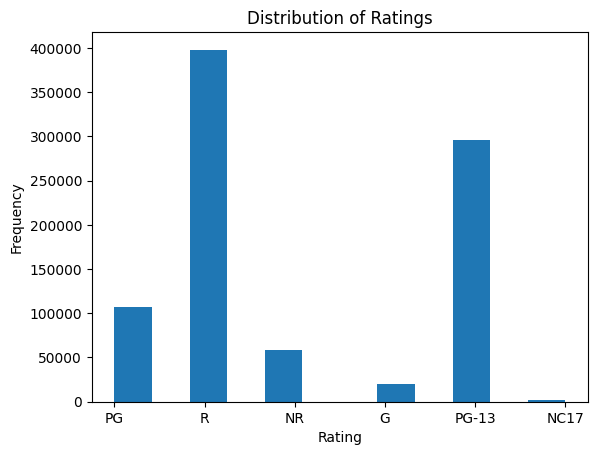

In [38]:
# Distribution of Ratings:
# Plot histogram of ratings
plt.hist(new_data['content_rating'], bins=12)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

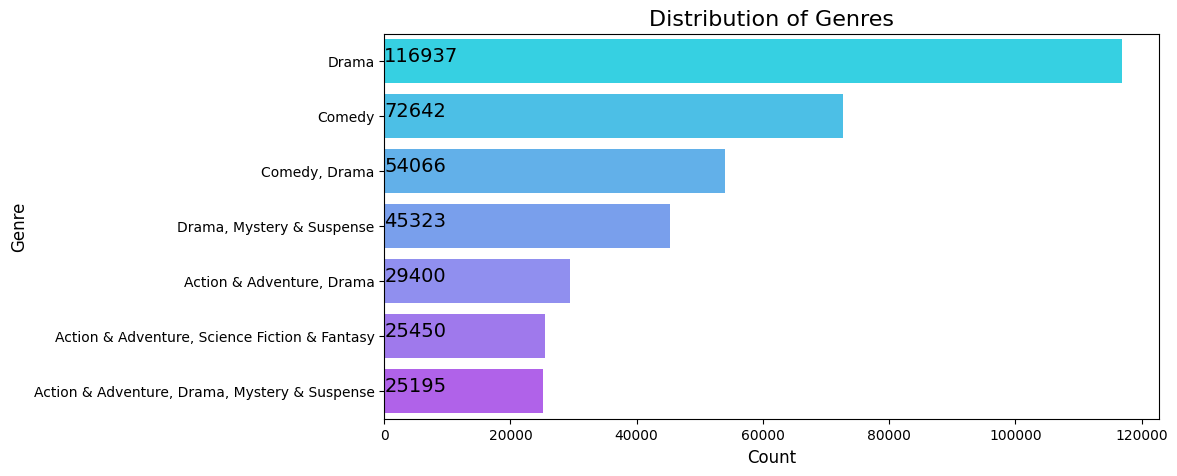

In [39]:
#Movie distribution by genre
a = plt.cm.cool
plt.figure(figsize=(10, 5))
count = new_data['genres'].value_counts()[:7]

sns.barplot(x=count.values, y=count.index, palette=[a(0.1), a(0.2), a(0.3), a(0.4), a(0.5), a(0.6), a(0.7)])

for i, v in enumerate(count.values):
    plt.text(0.8, i, v, color='k', fontsize=14)

plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title("Distribution of Genres", fontsize=16)

plt.show()

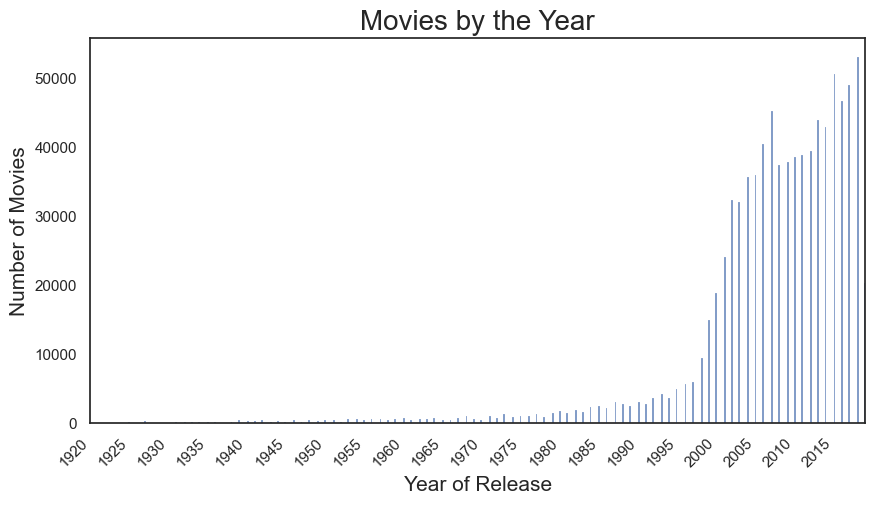

In [40]:
#Movies by year of release
sns.set(style="white")

plt.figure(figsize=(10, 5))
plt.title('Movies by the Year', size=20)
sns.histplot(new_data.Movie_Release_Year, kde=False)
plt.ylabel('Number of Movies', size=15)
plt.xlabel('Year of Release', size=15)
plt.xlim(1920, 2019)
plt.xticks(ticks=range(1920, 2018, 5), rotation=45, ha='right')
plt.show()

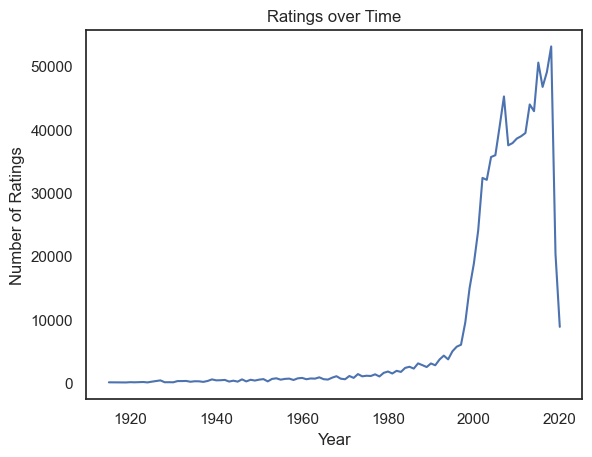

In [41]:
# Count the number of ratings per year
ratings_per_year = new_data['Movie_Release_Year'].value_counts().sort_index()

# Plot line chart of ratings over time
plt.plot(ratings_per_year.index, ratings_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.title('Ratings over Time')
plt.show()


Text(0, 0.5, 'Runtime (S)')

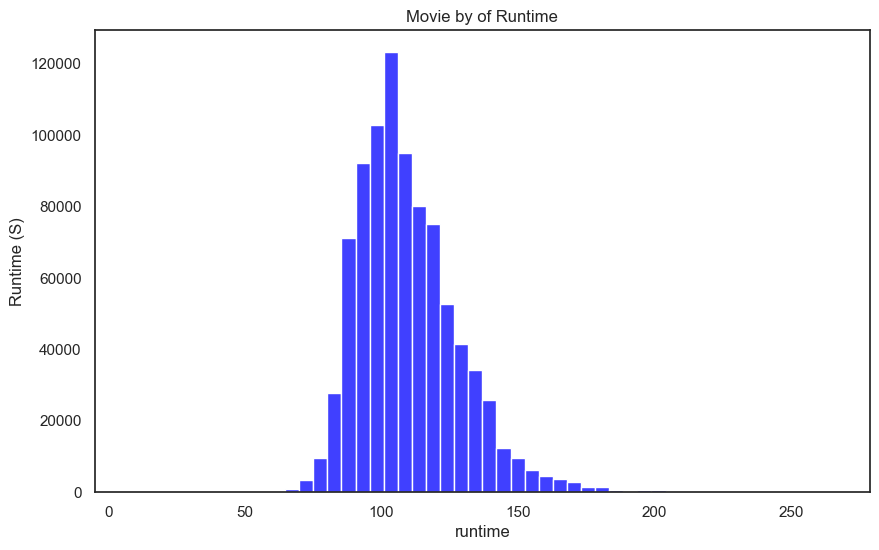

In [42]:
plt.figure(figsize=(10,6))
sns.histplot(data=new_data, x=new_data['runtime']
               , bins=50
             , palette='Purples'
            ,color='blue')
plt.title('Movie by of Runtime')
plt.ylabel('Runtime (S)')

Text(0, 0.5, 'Number of Ratings')

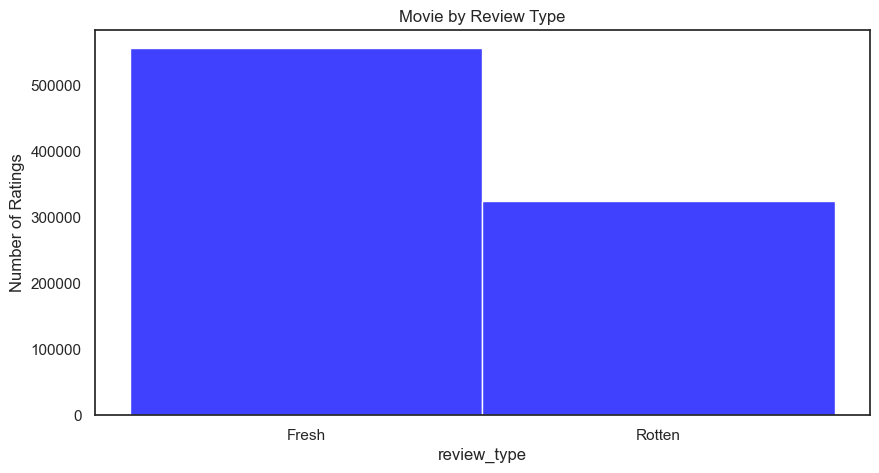

In [43]:
plt.figure(figsize=(10,5))
sns.histplot(data=new_data, x=new_data['review_type']
               , bins=10
             , palette='Purples'
            ,color='blue')
plt.title('Movie by Review Type')
plt.ylabel('Number of Ratings')

In [44]:
new_data.sample(3)

,rotten_tomatoes_link,critic_name,top_critic,review_type,review_content,movie_title,content_rating,genres,directors,actors,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,Movie_Release_Year
443994,m/im_still_here_2010,Catherine Bray,False,Fresh,Joaquin Phoenix gives the performance of a lif...,I'm Still Here,R,"Documentary, Musical & Performing Arts, Specia...",Casey Affleck,"Joaquin Phoenix, Casey Affleck, Antony Langdon...",...,Rotten,53.0,131.0,Spilled,38.0,20691.0,38,70,61,2010
402414,m/hara_kiri_death_of_a_samurai,Andrew L. Urban,False,Fresh,"A cinematic work of art, presenting a world in...",Hara-Kiri: Death of a Samurai,NR,"Action & Adventure, Art House & International,...","Kikumi Yamagishi, Takashi Miike","Ebizô Ichikawa, Eita, Hikari Mitsushima, Naoto...",...,Certified-Fresh,76.0,42.0,Upright,75.0,4463.0,15,32,10,2012
1048964,m/tower_heist,William Bibbiani,False,Rotten,Feels more like a droll drama than an actual c...,Tower Heist,PG-13,"Action & Adventure, Comedy, Drama",Brett Ratner,"Ben Stiller, Eddie Murphy, Casey Affleck, Alan...",...,Fresh,67.0,199.0,Spilled,48.0,57559.0,49,134,65,2011


In [45]:
new_data.columns

Index(['rotten_tomatoes_link', 'critic_name', 'top_critic', 'review_type',
       'review_content', 'movie_title', 'content_rating', 'genres',
       'directors', 'actors', 'original_release_date',
       'streaming_release_date', 'runtime', 'production_company',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_status', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count', 'Movie_Release_Year'],
      dtype='object')

In [46]:
df = new_data[["critic_name", "movie_title", "tomatometer_rating", "original_release_date", 'genres','actors', 'content_rating', 'review_type', 'directors', 'Movie_Release_Year', 'runtime']]


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881353 entries, 0 to 1129878
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   critic_name            881353 non-null  object        
 1   movie_title            881353 non-null  object        
 2   tomatometer_rating     881353 non-null  float64       
 3   original_release_date  881353 non-null  datetime64[ns]
 4   genres                 881353 non-null  object        
 5   actors                 881353 non-null  object        
 6   content_rating         881353 non-null  object        
 7   review_type            881353 non-null  object        
 8   directors              881353 non-null  object        
 9   Movie_Release_Year     881353 non-null  int64         
 10  runtime                881353 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 80.7+ MB


In [48]:
# Define the dictionary for renaming columns
rename_dict = {'critic_name': 'userId',
               'movie_title': 'movieId',
               'tomatometer_rating': 'rating',
               'original_release_date': 'timestamp'}

# Rename the columns using the dictionary
df = df.rename(columns=rename_dict)


In [49]:
user_ids = df["userId"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}

movie_ids = df["movieId"].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}

genres_ids = df["genres"].unique().tolist()
genres2genres_encoded = {x: i for i, x in enumerate(genres_ids)}
genresencoded2genres = {i: x for i, x in enumerate(genres_ids)}

actors_ids = df["actors"].unique().tolist()
actors2actors_encoded = {x: i for i, x in enumerate(actors_ids)}
actorsencoded2actors = {i: x for i, x in enumerate(actors_ids)}

review_type_ids = df["review_type"].unique().tolist()
review2review_encoded = {x: i for i, x in enumerate(review_type_ids)}
review_typeencoded2review_type = {i: x for i, x in enumerate(review_type_ids)}

director_ids = df["directors"].unique().tolist()
director2director_encoded = {x: i for i, x in enumerate(director_ids)}
directorencoded2director = {i: x for i, x in enumerate(director_ids)}

df["user"] = df["userId"].map(user2user_encoded)
df["movie"] = df["movieId"].map(movie2movie_encoded)
df["genreCode"] = df["genres"].map(genres2genres_encoded)
df["actorsCode"] = df["actors"].map(actors2actors_encoded)
df["reviewTypeCode"] = df["review_type"].map(review2review_encoded)
df["directorCode"] = df["directors"].map(director2director_encoded)

num_users = len(user2user_encoded)
num_movies = len(movie_encoded2movie)

df["rating"] = df["rating"].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(df["rating"])
max_rating = max(df["rating"])

print(
    "Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_movies, min_rating, max_rating
    )
)

Number of users: 9651, Number of Movies: 7906, Min rating: 0.0, Max rating: 100.0


In [50]:
df.sample(3)

,userId,movieId,rating,timestamp,genres,actors,content_rating,review_type,directors,Movie_Release_Year,runtime,user,movie,genreCode,actorsCode,reviewTypeCode,directorCode
228239,Kevin Carr,Dr. Seuss' The Cat in the Hat,9.0,2003-11-21,"Comedy, Kids & Family","Mike Myers, Alec Baldwin, Kelly Preston, Dakot...",PG,Rotten,Bo Welch,2003,82.0,140,1942,159,1989,1,1422
97359,Shaun Munro,A Dangerous Method,78.0,2011-11-23,"Drama, Mystery & Suspense","Keira Knightley, Viggo Mortensen, Michael Fass...",R,Fresh,David Cronenberg,2011,99.0,1322,983,10,1012,0,209
97903,Harris Dang,A Dog's Way Home,59.0,2019-01-11,Drama,"Ashley Judd, Edward James Olmos, Alexandra Shi...",PG,Rotten,Charles Martin Smith,2019,96.0,3439,987,7,1016,1,803


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881353 entries, 0 to 1129878
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   userId              881353 non-null  object        
 1   movieId             881353 non-null  object        
 2   rating              881353 non-null  float32       
 3   timestamp           881353 non-null  datetime64[ns]
 4   genres              881353 non-null  object        
 5   actors              881353 non-null  object        
 6   content_rating      881353 non-null  object        
 7   review_type         881353 non-null  object        
 8   directors           881353 non-null  object        
 9   Movie_Release_Year  881353 non-null  int64         
 10  runtime             881353 non-null  float64       
 11  user                881353 non-null  int64         
 12  movie               881353 non-null  int64         
 13  genreCode           881353 n

### Preparing training and validation data

In [52]:
reference_time = pd.Timestamp('1970-01-01')  # Unix Epoch
df['timestamp'] = df['timestamp'].apply(lambda x: int((x - reference_time).total_seconds()))

In [53]:
df = df.sample(frac=1, random_state=42)
x = df[["user", "movie", 'timestamp',"genreCode","actorsCode",'directorCode','reviewTypeCode', 'Movie_Release_Year', 'runtime' ]].values 

# Normalize the targets between 0 and 1. Makes it easy to train.
y = df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values


# Training on 80% of the data and validating on 20%.
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

### Building the Neural Network Model

In [54]:

EMBEDDING_SIZE = 50

class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super().__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size

        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-4),
        )

        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-4),
        )
        self.movie_bias = layers.Embedding(num_movies, 1)
        self.dropout = layers.Dropout(0.2)  # Add a dropout layer with a dropout rate of 0.2

       

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_vector = self.dropout(user_vector)  # Apply dropout
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_vector = self.dropout(movie_vector)  # Apply dropout
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
       
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)

model = RecommenderNet(num_users, num_movies, EMBEDDING_SIZE)
model.compile(run_eagerly=True, metrics=['accuracy'],
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.01)
)

### Training the model based on the data split

In [55]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=32,
    epochs=25,
    verbose=1,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/25
22034/22034 [==============================] - 421s 19ms/step - loss: 10.7356 - accuracy: 0.0047 - val_loss: 10.5870 - val_accuracy: 0.0054
Epoch 2/25
22034/22034 [==============================] - 398s 18ms/step - loss: 9.1081 - accuracy: 0.0058 - val_loss: 7.3872 - val_accuracy: 0.0065
Epoch 3/25
22034/22034 [==============================] - 408s 18ms/step - loss: 7.7681 - accuracy: 0.0064 - val_loss: 7.4720 - val_accuracy: 0.0066
Epoch 4/25
22034/22034 [==============================] - 403s 18ms/step - loss: 7.7546 - accuracy: 0.0067 - val_loss: 7.4745 - val_accuracy: 0.0068
Epoch 5/25
22034/22034 [==============================] - 403s 18ms/step - loss: 7.6157 - accuracy: 0.0069 - val_loss: 7.2432 - val_accuracy: 0.0070
Epoch 6/25
22034/22034 [==============================] - 398s 18ms/step - loss: 7.6778 - accuracy: 0.0070 - val_loss: 7.2952 - val_accuracy: 0.0070
Epoch 7/25
22034/22034 [==============================] - 396s 18ms/step - loss: 7.6615 - accuracy: 0.00

### Evaluating the Model

In [56]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_val, y_val)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

5509/5509 [==============================] - 37s 7ms/step - loss: 7.0732 - accuracy: 0.0071
Test Loss: 7.0731587409973145
Test Accuracy: 0.007080007344484329


In [57]:
# Make predictions on the test data
y_pred = model.predict(x_val)

# Convert the predicted ratings to binary labels using a threshold
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

# Convert the true labels to binary using a threshold
y_test_binary = (y_val >= threshold).astype(int)

# Calculate RMSE and MAE (for regression evaluation)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)


# Print the evaluation results
print("RMSE:", rmse)
print("MAE:", mae)


5509/5509 [==============================] - 13s 2ms/step
RMSE: 0.3408802452602441
MAE: 0.2710868583889593


In [58]:
def calculate_hit_ratio_at_k(y_true, y_pred, threshold=0.5, k=10):
    """
    Calculate the hit ratio at K of the recommender model.
    
    Parameters:
        y_true (numpy array): True ratings of the items.
        y_pred (numpy array): Predicted ratings of the items.
        threshold (float): Threshold to classify positive ratings (default is 0.5).
        k (int): Number of top recommendations to consider (default is 10).
        
    Returns:
        float: Hit ratio at K of the model.
    """
    y_true_binary = (y_true >= threshold)
    
    # Get the indices of the top K recommendations for each user
    top_k_indices = np.argsort(y_pred, axis=0)[-k:]
    
    total_hits_at_k = 0
    for i in range(y_true.shape[0]):
        if y_true_binary[i] == 1 and i in top_k_indices:
            total_hits_at_k += 1
    
    hit_ratio_at_k = total_hits_at_k / k
    return hit_ratio_at_k



In [59]:
#Hit ratio at 10
hit_ratio_at_10 = calculate_hit_ratio_at_k(y_val, y_pred, k=10)

print("Hit Ratio at 10:", hit_ratio_at_10)



Hit Ratio at 10: 1.0


**Plot training and validation loss**

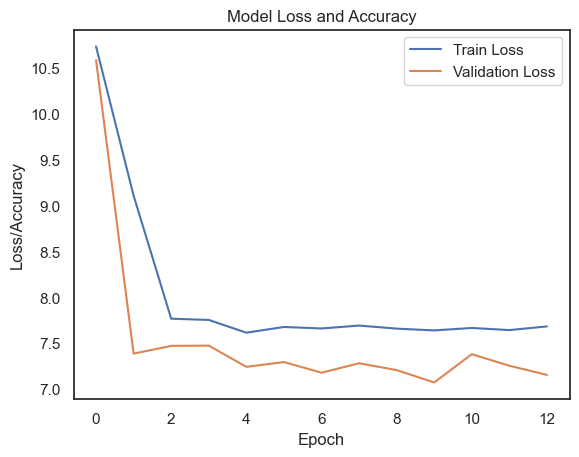

In [60]:
import matplotlib.pyplot as plt

# Plot the training loss and validation loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train Loss", "Validation Loss"], loc="upper right")
plt.show()



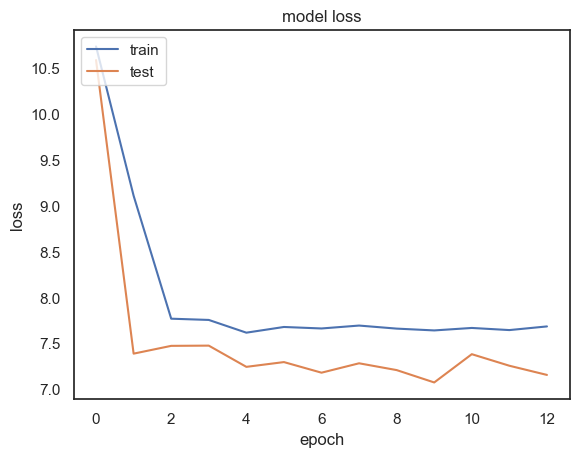

In [61]:
# Plot the training loss and validation loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()


### Recommending Top-10 movie

In [62]:
# Generate recommendations for a user

user_id = df["user"].sample(1).iloc[0]
user_movies = df[df["user"] == user_id]["movie"]
movies_not_watched = df[~df["movie"].isin(user_movies)]["movie"].unique()
user_encoded = df[df["user"] == user_id]["user"].iloc[0]

# Check if the user has watched any movies
if len(user_movies) > 0:
    movies_not_watched_encoded = [movie for movie in movies_not_watched if movie in range(num_movies)]
    if len(movies_not_watched_encoded) > 0:
        user_movie_array = np.column_stack(([user_encoded] * len(movies_not_watched_encoded), movies_not_watched_encoded))
        ratings = model.predict(user_movie_array).flatten()
        top_ratings_indices = ratings.argsort()[-10:][::-1]
        recommended_movie_ids = [movies_not_watched_encoded[i] for i in top_ratings_indices]

        # Map the encoded movie IDs to their original movie titles
        movie_encoded2movie = {i: movie_title for i, movie_title in enumerate(df["movieId"].unique())}

        # Print the recommended movies
        print("Showing recommendations for user: {}".format(user_id))
        print("====" * 9)
        print("Top 10 movie recommendations")
        print("----" * 8)
        recommended_movies = [movie_encoded2movie.get(movie_id) for movie_id in recommended_movie_ids]
        for movie_id in recommended_movies:
            
            print(movie_id, )
    else:
        print("No movie recommendations available for the user.")
else:
    print("No movie recommendations available for the user.")

247/247 [==============================] - 1s 4ms/step
Showing recommendations for user: 2975
Top 10 movie recommendations
--------------------------------
Kangaroo Jack
Mumford
The Ice Storm
In Fear
X-Men: Apocalypse
Hounddog
Youssou Ndour: I Bring What I Love
Fast & Furious
Mao's Last Dancer
Near Dark


### Data Analysis of Result

**To Show the effectiveness of the model, we perform some analysis of the result**

In [63]:
# Create an empty dataframe to store the recommendations
recommendations_df = pd.DataFrame(columns=["User ID R", "Recommended Movies"])

for _ in range(10):
    # Generate recommendations for a user
    user_id = df["user"].sample(1).iloc[0]
    user_movies = df[df["user"] == user_id]["movie"]
    movies_not_watched = df[~df["movie"].isin(user_movies)]["movie"].unique()
    user_encoded = df[df["user"] == user_id]["user"].iloc[0]

    recommendations = []  # List to store recommended movie IDs

    # Check if the user has watched any movies
    if len(user_movies) > 0:
        movies_not_watched_encoded = [movie for movie in movies_not_watched if movie in range(num_movies)]
        if len(movies_not_watched_encoded) > 0:
            user_movie_array = np.column_stack(([user_encoded] * len(movies_not_watched_encoded), movies_not_watched_encoded))
            ratings = model.predict(user_movie_array).flatten()
            top_ratings_indices = ratings.argsort()[-10:][::-1]
            recommended_movie_ids = [movies_not_watched_encoded[i] for i in top_ratings_indices]

            recommendations.extend(str(movie_id) for movie_id in recommended_movie_ids)
    
    # Append the recommendations to the dataframe
    recommendations_df = recommendations_df.append({"User ID R": user_id, "Recommended Movies": ", ".join(recommendations)}, ignore_index=True)

# Group the recommendations by user ID
grouped_recommendations_df = recommendations_df.groupby("User ID R")["Recommended Movies"].apply(lambda x: ", ".join(x)).reset_index()

# Print the grouped recommendations dataframe
grouped_recommendations_df

222/222 [==============================] - 1s 2ms/step


C:\Users\701492\AppData\Local\Temp\ipykernel_13736\497318544.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommendations_df = recommendations_df.append({"User ID R": user_id, "Recommended Movies": ", ".join(recommendations)}, ignore_index=True)


227/227 [==============================] - 0s 2ms/step


C:\Users\701492\AppData\Local\Temp\ipykernel_13736\497318544.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommendations_df = recommendations_df.append({"User ID R": user_id, "Recommended Movies": ", ".join(recommendations)}, ignore_index=True)


176/176 [==============================] - 1s 4ms/step


C:\Users\701492\AppData\Local\Temp\ipykernel_13736\497318544.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommendations_df = recommendations_df.append({"User ID R": user_id, "Recommended Movies": ", ".join(recommendations)}, ignore_index=True)


247/247 [==============================] - 1s 2ms/step


C:\Users\701492\AppData\Local\Temp\ipykernel_13736\497318544.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommendations_df = recommendations_df.append({"User ID R": user_id, "Recommended Movies": ", ".join(recommendations)}, ignore_index=True)


226/226 [==============================] - 1s 4ms/step


C:\Users\701492\AppData\Local\Temp\ipykernel_13736\497318544.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommendations_df = recommendations_df.append({"User ID R": user_id, "Recommended Movies": ", ".join(recommendations)}, ignore_index=True)


212/212 [==============================] - 0s 2ms/step


C:\Users\701492\AppData\Local\Temp\ipykernel_13736\497318544.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommendations_df = recommendations_df.append({"User ID R": user_id, "Recommended Movies": ", ".join(recommendations)}, ignore_index=True)


247/247 [==============================] - 1s 4ms/step


C:\Users\701492\AppData\Local\Temp\ipykernel_13736\497318544.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommendations_df = recommendations_df.append({"User ID R": user_id, "Recommended Movies": ", ".join(recommendations)}, ignore_index=True)


243/243 [==============================] - 1s 2ms/step


C:\Users\701492\AppData\Local\Temp\ipykernel_13736\497318544.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommendations_df = recommendations_df.append({"User ID R": user_id, "Recommended Movies": ", ".join(recommendations)}, ignore_index=True)


227/227 [==============================] - 1s 3ms/step


C:\Users\701492\AppData\Local\Temp\ipykernel_13736\497318544.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommendations_df = recommendations_df.append({"User ID R": user_id, "Recommended Movies": ", ".join(recommendations)}, ignore_index=True)


245/245 [==============================] - 1s 2ms/step


C:\Users\701492\AppData\Local\Temp\ipykernel_13736\497318544.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommendations_df = recommendations_df.append({"User ID R": user_id, "Recommended Movies": ", ".join(recommendations)}, ignore_index=True)


,User ID R,Recommended Movies
0,91,"7263, 5678, 6992, 2132, 4313, 3757, 6557, 2357..."
1,170,"1701, 4415, 5139, 3712, 5655, 1852, 3113, 6589..."
2,442,"7263, 1827, 885, 5719, 1889, 6201, 5752, 5873,..."
3,475,"6350, 2220, 6777, 4936, 4159, 4703, 6055, 3648..."
4,678,"326, 1329, 6543, 1275, 5242, 980, 6489, 5693, ..."
5,688,"4250, 6485, 6541, 1445, 1367, 5802, 4141, 7010..."
6,845,"7527, 5414, 4638, 5753, 7235, 3240, 6373, 5932..."
7,2149,"398, 7250, 4105, 3, 3084, 4703, 3953, 7500, 37..."
8,4591,"1498, 3084, 5414, 259, 4141, 7262, 7261, 2598,..."
9,7079,"6350, 5752, 5775, 5414, 4105, 5123, 4058, 5240..."


In [64]:
df_rec = pd.DataFrame(grouped_recommendations_df)

# Split the "Recommended Movies" column into separate columns
df_rec[['Movie 1', 'Movie 2', 'Movie 3', 'Movie 4', 'Movie 5', 'Movie 6', 'Movie 7', 'Movie 8', 'Movie 9', 'Movie 10']] = grouped_recommendations_df['Recommended Movies'].str.split(", ", expand=True)

# Drop the "Recommended Movies" column
df_rec.drop('Recommended Movies', axis=1, inplace=True)

df_rec

,User ID R,Movie 1,Movie 2,Movie 3,Movie 4,Movie 5,Movie 6,Movie 7,Movie 8,Movie 9,Movie 10
0,91,7263,5678,6992,2132,4313,3757,6557,2357,5085,5458
1,170,1701,4415,5139,3712,5655,1852,3113,6589,6453,886
2,442,7263,1827,885,5719,1889,6201,5752,5873,391,6714
3,475,6350,2220,6777,4936,4159,4703,6055,3648,6412,4473
4,678,326,1329,6543,1275,5242,980,6489,5693,4110,841
5,688,4250,6485,6541,1445,1367,5802,4141,7010,6105,7262
6,845,7527,5414,4638,5753,7235,3240,6373,5932,7500,7537
7,2149,398,7250,4105,3,3084,4703,3953,7500,3732,5845
8,4591,1498,3084,5414,259,4141,7262,7261,2598,5572,5240
9,7079,6350,5752,5775,5414,4105,5123,4058,5240,5869,7262


In [ ]:
'''
Using the df_rec dataframe to extract the recommended movie IDs,
we then filter the df dataframe to get the relevant information for each analysis.

'''

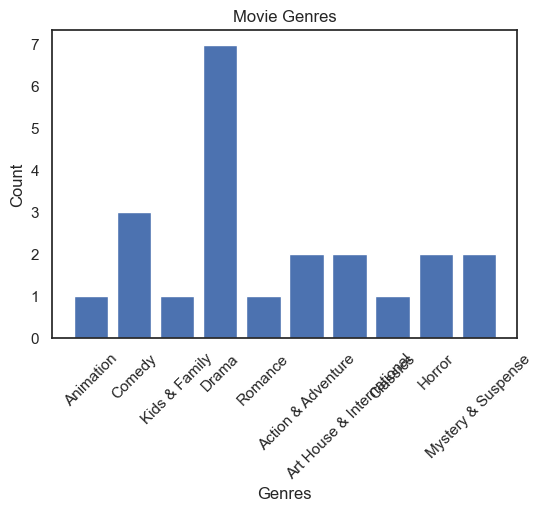

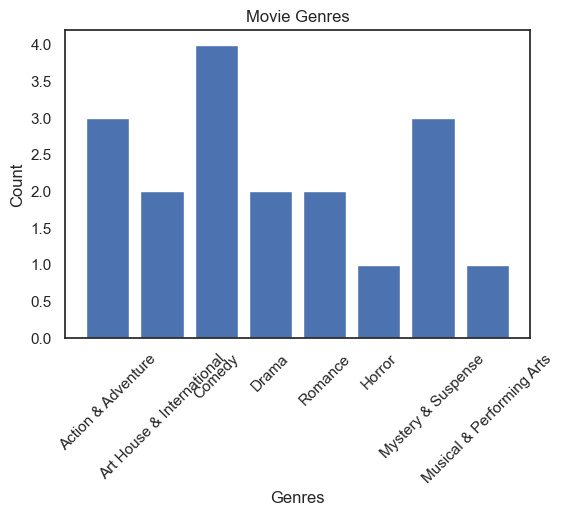

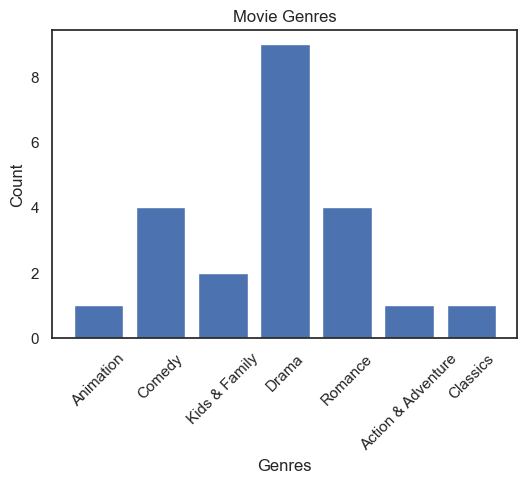

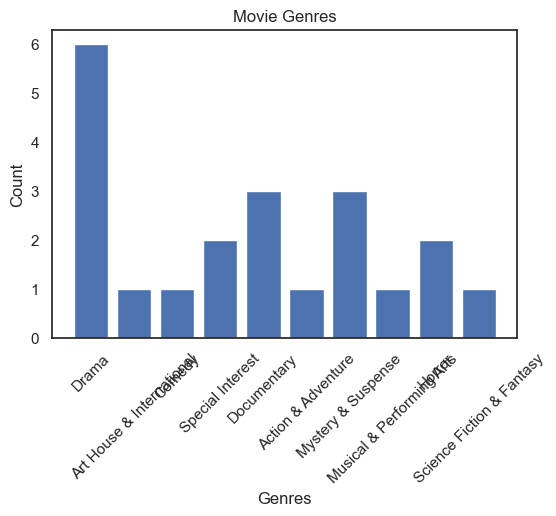

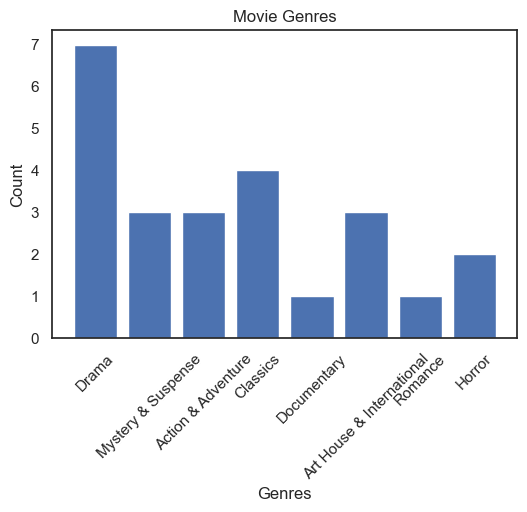

In [86]:
#Data analysis of movie genre
def analyze_genre_counts(df_rec, index):
    x = df_rec[index:index+1].values[0].astype('int')
    x = x[1:]

    analysis_df = df[df['movie'].isin(x)]
    unique_movies_df = analysis_df.drop_duplicates(subset=['movie'])

    data = unique_movies_df

    # Extract genre labels and their respective counts
    genres = data['genres']
    genre_counts = {}

    for genre_list in genres:
        genre_list = genre_list.split(', ')
        for genre in genre_list:
            if genre in genre_counts:
                genre_counts[genre] += 1
            else:
                genre_counts[genre] = 1

    # Create a bar plot of genre counts
    plt.figure(figsize=(6, 4))
    plt.bar(genre_counts.keys(), genre_counts.values())
    plt.xlabel('Genres')
    plt.ylabel('Count')
    plt.title('Movie Genres')
    plt.xticks(rotation=45)
    plt.show()

# Example usage
for i in range(5):  # Loop over df_rec subsets from 0:1 to 4:5
    analyze_genre_counts(df_rec, i)


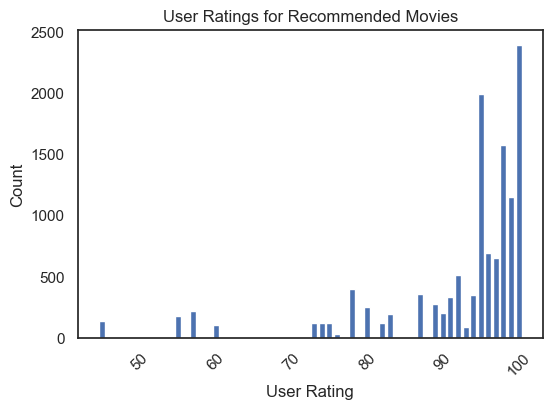

In [97]:
#User Rating Analysis

# Get user ratings for the recommended movies from the main DataFrame
user_ratings_df = df[df['movie'].isin(recommended_movie_ids)][['userId', 'rating']]

# Extract user rating labels and their respective counts
user_rating_counts = user_ratings_df['rating'].value_counts()

# Create a bar plot of user rating counts for the recommended movies
plt.figure(figsize=(6, 4))
plt.bar(user_rating_counts.index, user_rating_counts.values)
plt.xlabel('User Rating')
plt.ylabel('Count')
plt.title('User Ratings for Recommended Movies')
plt.xticks(rotation=45)
plt.show()


In [91]:
#Diversity Analysis

'''
Here we calculate the number of unique genres
present in the recommended movies.
'''
# Extract movie IDs of the recommended movies
recommended_movie_ids = df_rec.iloc[:, 1:].values.flatten().astype(int)

# Filter the main DataFrame to get the recommended movies
recommended_movies_df = df[df['movie'].isin(recommended_movie_ids)]

# Extract unique genres for the recommended movies
unique_genres = recommended_movies_df['genres'].str.split(', ').explode().unique()

# Count the number of unique genres
num_unique_genres = len(unique_genres)

print("Number of Unique Genres in Recommended Movies:", num_unique_genres)


Number of Unique Genres in Recommended Movies: 16


#### Cold Start Analysis

In [93]:
#Cold Start Analysis

'''
We investigate whether any new users 
or whether new movies are present in the recommended movies.
'''

# Extract user IDs from the first row of df_rec (excluding the first column)
user_ids = df_rec.iloc[0, 1:].values.astype(int)

# Extract movie IDs of the recommended movies
recommended_movie_ids = df_rec.iloc[:, 1:].values.flatten().astype(int)

# Check if there are any new users or movies in the recommended movies
new_users = df[~df['user'].isin(user_ids)]['user'].unique()
new_movies = df[~df['movie'].isin(recommended_movie_ids)]['movie'].unique()

print("New Users in Recommended Movies:", new_users)
print("New Movies in Recommended Movies:", new_movies)


New Users in Recommended Movies: [  19  556  483 ... 7661 5761 8088]
New Movies in Recommended Movies: [4512 6632 4708 ... 2328 3033 3419]


#### Content Rating

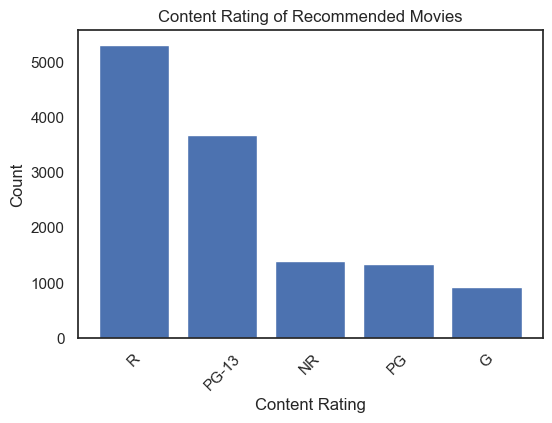

In [87]:
# Extract content ratings of the recommended movies
content_ratings = df_rec.iloc[:, 1:].values.flatten().astype(int)
content_ratings_df = df[df['movie'].isin(content_ratings)]

# Extract content rating labels and their respective counts
content_rating_counts = content_ratings_df['content_rating'].value_counts()

# Create a bar plot of content rating counts
plt.figure(figsize=(6, 4))
plt.bar(content_rating_counts.index, content_rating_counts.values)
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.title('Content Rating of Recommended Movies')
plt.xticks(rotation=45)
plt.show()
